# Problema 2

### Importing libraries

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

### Creating data

In [29]:
def generate_points(points_number, mean, std):
    """
    Inputs:
    - points_number = Amout of required 3D points
    - mean = Mean for Gaussian distribution
    - std = Standard desviation for Gaussian distribution
    Output:
    - X: Tensor with all 3D points generated
    Description:
    - Given an amount of points, a mean & a standard deviation
    generates a tensor with randon 3D points
    
    X = [x1 ... xn], where xi belongs to R3
    xi = [                      Xrand_i
                                Yrand_i  
          f(Xrand_i, Yrand_i) = 0.2*Xrand_i + Yrand_i + epsilon ]
    epsilon = random[N(mean, std)] 
    """
    
    #Creating Gaussians values (epsilon)
    epsilon = torch.normal(mean, std, size=(1, points_number))
    
    #Creating random X,Y values
    Xrand_Yrand = torch.rand(2, points_number)
    
    #Computing f(x, y)
    f_x_y = 0.2*Xrand_Yrand[0, :] + Xrand_Yrand[1, :] + epsilon
    
    #Creating X
    X = torch.cat((Xrand_Yrand, f_x_y), dim = 0)
    
    #Plotting points
    # Creating figure
    fig = plt.figure()
    ax = plt.axes(projection = "3d")
     # Creating plot
    ax.scatter3D(X[0, :], X[1, :], X[2, :])
    # show plot
    plt.show()    
    
    #Returning data
    return X

### Computing covariance matrix

In [30]:
def cov_matrix(data):
    """
    Inputs:
    - data: Dataset which will have its
    covariance matrix computed
    Outputs:
    - cov_matrix: Covariance matrix of the 
    given data
    Description:
    - Computes covariance matrix using
    Pytorch
    """
    
    #Computing covariance matrix
    cov_matrix = torch.cov(data)
    
    #Printing covariance matrix dimensions
    print("Covariance matrix dimensions are: [{}, {}]\n".format(cov_matrix.shape[0], cov_matrix.shape[1]))
    
    #Returning covariance matrix
    return cov_matrix

### Computing eigenvectors & eigenvalues

In [31]:
def eigenvectors_eigenvalues(cov_matrix):
    """
    Inputs:
    - cov_matrix: Dataset covariance matrix
    Output:
    - v: Eigenvalues
    - w: Eigenvector
    Description:
    - Computes eigenvalues and eigenvectors
    using numpy
    """
    
    #Computing eigenvalues and eigenvectors
    d, w = np.linalg.eigh(cov_matrix)
    
    #Parsing into PyTorch tensors
    d = torch.tensor(d)
    w = torch.tensor(w)
    
    #Printing eigenvalues
    print("The eigenvalues are: {}\n".format(d))
    
    #Printing eigenvectors
    print("The eigenvectors are:\n")
    print("w1: {}\n".format(w[0]))
    print("w2: {}\n".format(w[1]))
    print("w3: {}\n".format(w[2]))
    
    #Returning eigenvalues and eigenvector
    return d, w

### Creating new subspace

In [6]:
def creating_subspace(d, w):
    """
    Inputs:
    - d: Eigenvalues
    - w: Eigenvectors
    Outputs:
    - V: New subspace created using the two highest
    eigenvalues and their respective eigenvectors
    Description:
    - Sorts the eigenvalues in descending orders to 
    get its eigenvectors and creates a new subspace
    """
     
    #Sorting eigenvalues in descending order
    sort_d, idx = torch.sort(d, descending = True)

    #Grabing eigenvectors of the two highest eigenvalues
    v1 = w[idx[0]]
    v2 = w[idx[1]]
    
    #Creating subspace V
    V = torch.stack((v1,v2), 1)
    
    #Printing V
    print("Subspace V: \n")
    print(V,"\n")
    
    #Returning V
    return V

### Checking orthonormality

In [7]:
def check_orthonormality(V):
    """
    Inputs:
    - V: New subspace created using the two highest
    eigenvalues and their respective eigenvectors
    Outputs:
    - None
    Description:
    - Computes dot product between subspace bases 
    as well as each vector norm
    """
    print("Checking orthonormality \n")
    
    #Computing dot product
    dot = torch.dot(V[:, 0], V[:, 1])

    #Printing dot product
    print("v1 ° v2 = {}".format(dot))
    
    #Computing vectors norms
    v1_norm = torch.linalg.vector_norm(V[:, 0], ord = 2)
    v2_norm = torch.linalg.vector_norm(V[:, 1], ord = 2)
    
    #Printing L2 norms
    print("v1 L2 norm = {}".format(v1_norm))
    print("v2 L2 norm = {}".format(v2_norm))
    print("\n")

### Computing data mean and new matrix with its origin in the mean

In [32]:
def matrix_mean(X):
    """
    Inputs:
    - X: Tensor with all 3D points generated
    Outputs:
    - X_mean_sustracted: New dataset centered with
    the mean as its new origin
    Description:
    - 
    """
    
    #Computing mean
    mean = torch.mean(X, dim = 0)
    
    #Subtract the mean from X
    X_mean_sustracted = X - mean
    
    #Printing new dataset
    print("X - mean: \n")
    print(X_mean_sustracted,"\n")
    
    #Returning X_mean_sustracted
    return X_mean_sustracted

### Main function

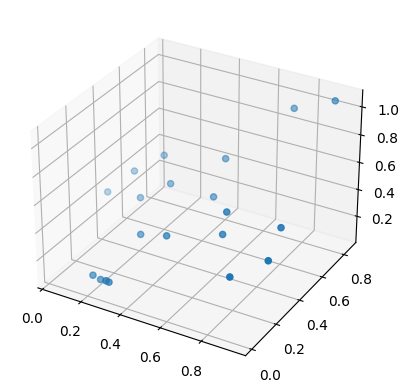

Covariance matrix dimensions are: [3, 3]

The eigenvalues are: tensor([0.0008, 0.0574, 0.1468])

The eigenvectors are:

w1: tensor([-0.1211, -0.8272, -0.5487])

w2: tensor([-0.7068,  0.4600, -0.5374])

w3: tensor([ 0.6970,  0.3228, -0.6403])

Subspace V: 

tensor([[ 0.6970, -0.7068],
        [ 0.3228,  0.4600],
        [-0.6403, -0.5374]]) 

Checking orthonormality 

v1 ° v2 = 4.470348358154297e-08
v1 L2 norm = 0.9999999403953552
v2 L2 norm = 0.9999999403953552


X - mean: 

tensor([[-0.0241, -0.1014,  0.0730,  0.1588, -0.2226,  0.1405, -0.2303,  0.2150,
          0.1048,  0.4187, -0.0653,  0.1441, -0.2368,  0.3216,  0.3983,  0.0241,
         -0.1261, -0.0944,  0.0392,  0.0989],
        [-0.0871,  0.0175, -0.0573, -0.1800,  0.0640, -0.1374,  0.1210, -0.1574,
         -0.1215, -0.2878, -0.0217, -0.1171,  0.0898, -0.2274, -0.2829, -0.0352,
          0.0557, -0.0353, -0.0333, -0.0502],
        [ 0.1112,  0.0838, -0.0157,  0.0211,  0.1586, -0.0031,  0.1093, -0.0577,
          0.0167, -0.13

In [33]:
def main():
    points_numer = 20
    mean = 0
    std = 0.05
    X = generate_points(points_numer, mean, std)
    Cov_X = cov_matrix(X)
    D, W = eigenvectors_eigenvalues(Cov_X)
    V = creating_subspace(D, W)
    check_orthonormality(V)
    X_mean_sustracted = matrix_mean(X)
if __name__ == "__main__":
    main()    